In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [2]:
train_data = pd.read_csv('datasets/titanic_train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info() #i have null values and non numeric values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


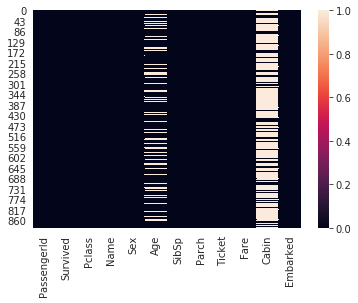

In [5]:
sns.heatmap(data=train_data.isnull()) #a lot of age data and cabin data is missing,
                                      #some embarked data too

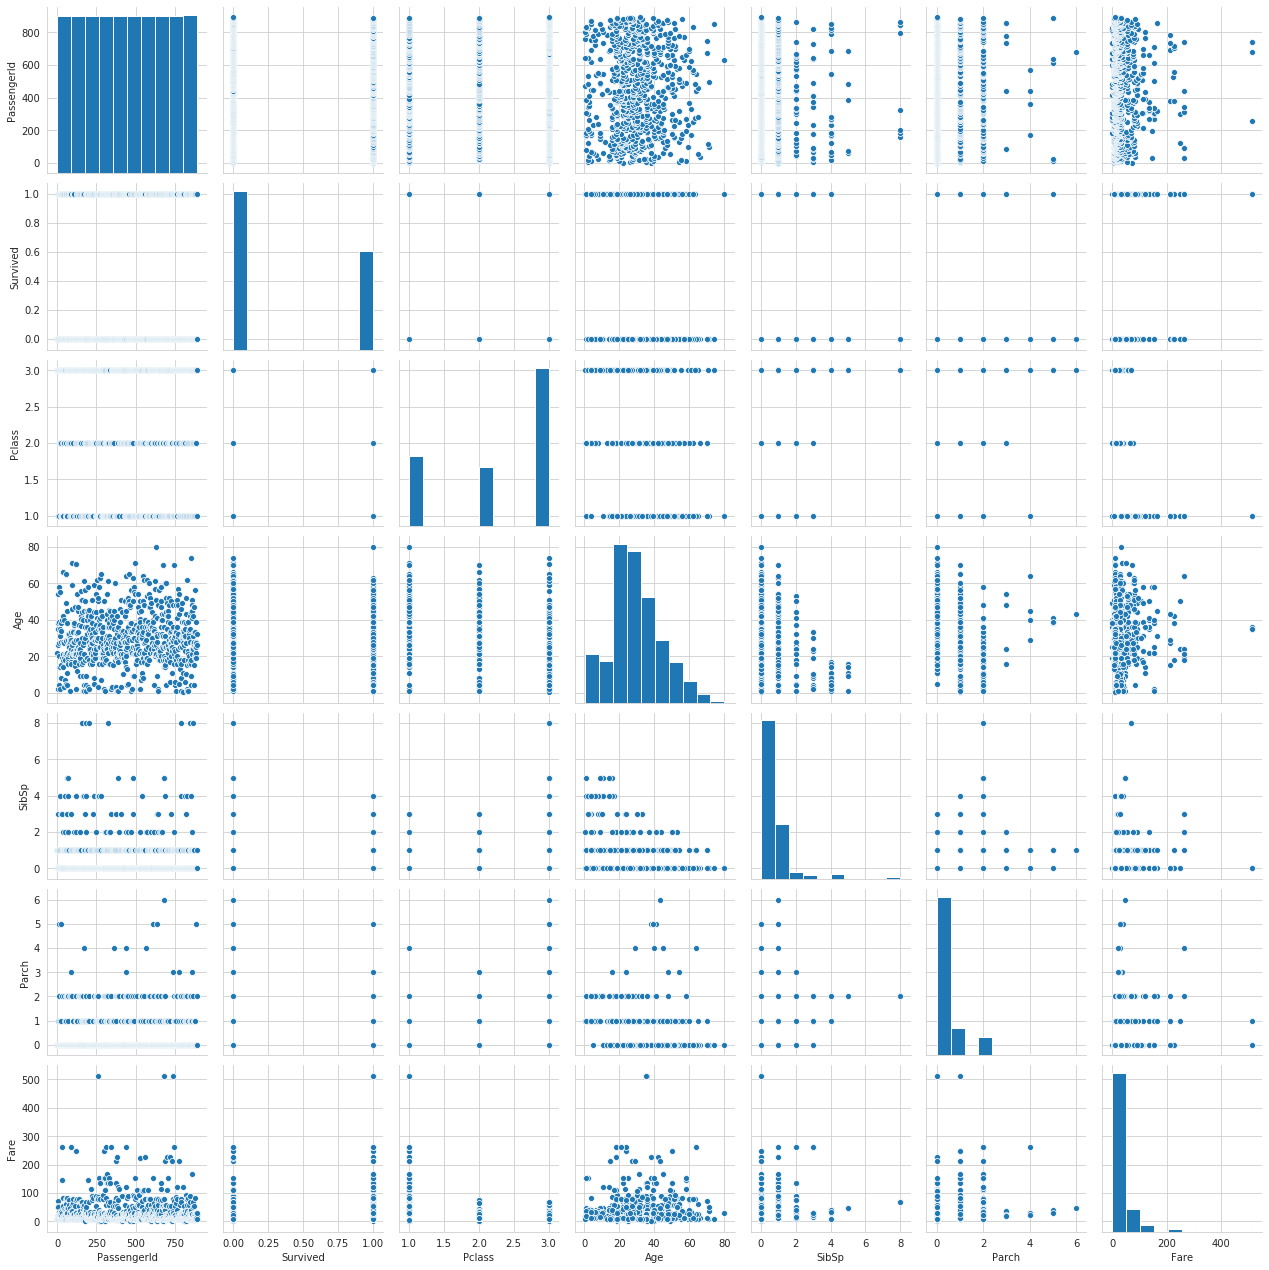

In [6]:
sns.pairplot(train_data)

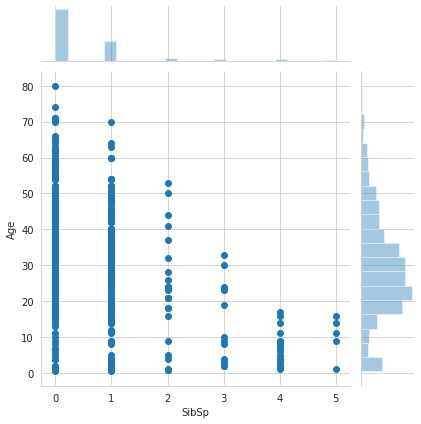

In [7]:
sns.jointplot(x='SibSp', y='Age', data=train_data)
#the number of sibilings/spouces seems decently related to age,
#i could be wrong! the other one i want to test is Pclass

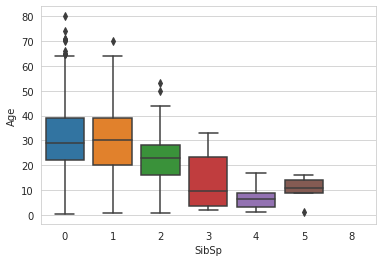

In [8]:
sns.boxplot(x='SibSp', y='Age', data=train_data)

In [9]:
means = train_data.groupby('SibSp')['Age'].mean()
means

SibSp
0    31.397558
1    30.089727
2    22.620000
3    13.916667
4     7.055556
5    10.200000
8          NaN
Name: Age, dtype: float64

In [10]:
#i will use SibSp to fill in the age data with mean values
def fill_age(cols):
    means = train_data.groupby('SibSp')['Age'].mean()
    age = cols[0]
    sibSp = cols[1]
    
    if pd.isnull(age):
        if sibSp == 0:
            return means[0]
        elif sibSp == 1:
            return means[1]
        elif sibSp == 2:
            return means[2]
        elif sibSp == 3:
            return means[3]
        elif sibSp == 4:
            return means[4]
        else:
            return means[5]
    else:
        return age

In [11]:
train_data['Age'] = train_data[['Age','SibSp']].apply(fill_age, axis=1)

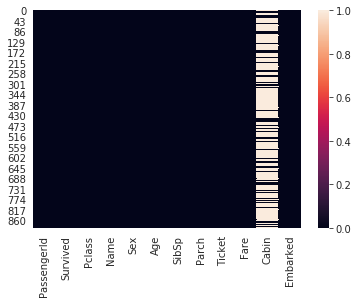

In [12]:
sns.heatmap(train_data.isnull())

In [13]:
train_data.drop('Cabin', axis=1, inplace=True) #useless for now

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
train_data['Embarked'].unique() #needs to become numerical input

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
#to do: complete missing data on embark, check model, proceed to use test_data, clean etc...

In [17]:
train_data.dropna(inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [18]:
#drop_first is used to remove either male or female column, we must only keep one which
#tells us if a passenger is either male/female or not
sex = pd.get_dummies(data=train_data['Sex'],drop_first=True)
embarked = pd.get_dummies(data=train_data['Embarked'], drop_first=True)

In [19]:
train_data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [20]:
train_data = pd.concat([train_data,sex,embarked], axis=1)

In [21]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
train_data.drop('PassengerId', axis=1, inplace=True)
train_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [23]:
X = train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y = train_data['Survived']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()

In [28]:
lr.fit(X_train,y_train)

/home/jimmy/virtual_environments/python_data_science/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
coeficients = pd.DataFrame(data=lr.coef_[0],index=X.columns,columns=['Coef'])
coeficients

,Coef
Pclass,-1.002670
Age,-0.045898
SibSp,-0.397258
Parch,-0.015749
Fare,0.004026
male,-2.499922
Q,0.179375
S,-0.138771


In [30]:
predictions = lr.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       155
           1       0.83      0.66      0.74       112

    accuracy                           0.80       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.80      0.80       267

